****Alucar - Analisando as vendas****

In [43]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from pandas.plotting import autocorrelation_plot

In [44]:
chocolura = pd.read_csv('./data/chocolura.csv', sep=',')
chocolura.head()

,mes,vendas
0,2017-01,210
1,2017-02,185
2,2017-03,209
3,2017-04,280
4,2017-05,211


In [45]:
chocolura.dtypes

mes       object
vendas     int64
dtype: object

In [46]:
print("Quantidade de linhas e coluna: {}".format(chocolura.shape))
print("Quantidade de dados nulos: {}".format(chocolura.isna().sum().sum()))

Quantidade de linhas e coluna: (24, 2)
Quantidade de dados nulos: 0


In [47]:
chocolura['mes'] = pd.to_datetime(chocolura['mes'])
chocolura.dtypes

mes       datetime64[ns]
vendas             int64
dtype: object

**Aumento e aceleração do número de assinantes**

In [48]:
chocolura['aumento'] = chocolura['vendas'].diff()
chocolura['aceleracao'] = chocolura['aumento'].diff()
chocolura.head()

,mes,vendas,aumento,aceleracao
0,2017-01-01,210,NaN,NaN
1,2017-02-01,185,-25.0,NaN
2,2017-03-01,209,24.0,49.0
3,2017-04-01,280,71.0,47.0
4,2017-05-01,211,-69.0,-140.0


In [49]:
def plot_comparacao(x, y1, y2, y3, dataset, title):
    sns.set_palette('Accent')
    sns.set_style('darkgrid')
    plt.figure(figsize=(16,12))
    ax = plt.subplot(3,1,1)
    ax.set_title(title, fontsize=18, loc='left')
    sns.lineplot(x=x, y=y1, data=dataset)
    plt.subplot(3,1,2)
    sns.lineplot(x=x, y=y2, data=dataset)
    plt.subplot(3,1,3)
    sns.lineplot(x=x, y=y3, data=dataset)
    ax = ax

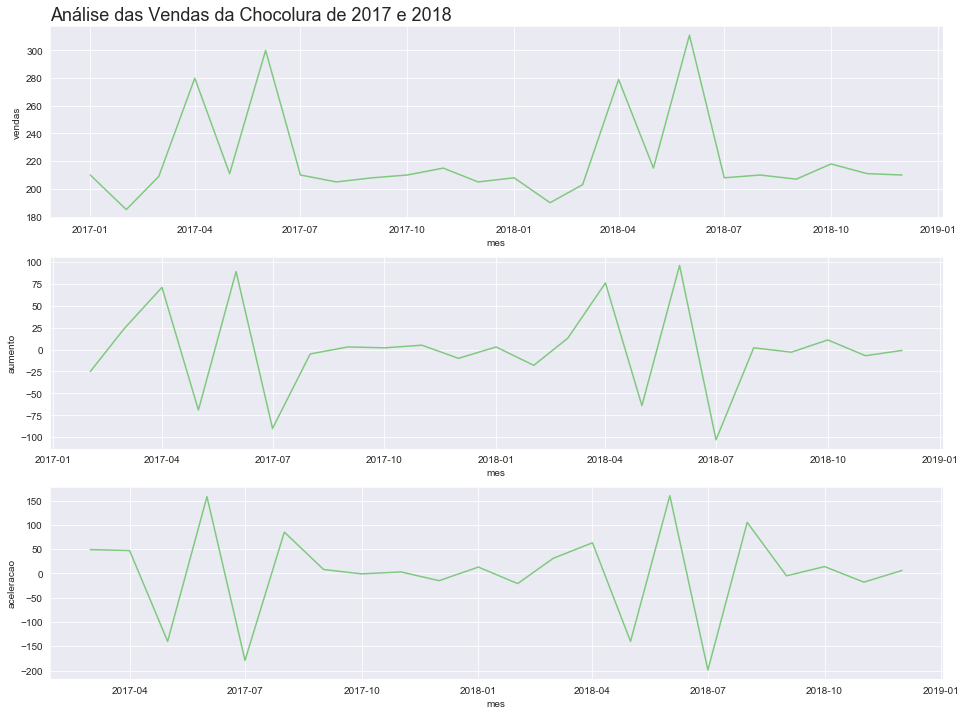

In [50]:
plot_comparacao('mes', 'vendas', 'aumento', 'aceleracao', chocolura, 'Análise das Vendas da Chocolura de 2017 e 2018')

**Vendas diárias(Outubro e Novembro)**


In [51]:
vendas_por_dia = pd.read_csv('./data/vendas_por_dia.csv', sep=',')
vendas_por_dia.head()

,dia,vendas
0,2018-10-01,50
1,2018-10-02,48
2,2018-10-03,56
3,2018-10-04,50
4,2018-10-05,51


In [52]:
vendas_por_dia.dtypes

dia       object
vendas     int64
dtype: object

In [53]:
print("Quantidade de linhas e coluna: {}".format(vendas_por_dia.shape))
print("Quantidade de dados nulos: {}".format(vendas_por_dia.isna().sum().sum()))

Quantidade de linhas e coluna: (61, 2)
Quantidade de dados nulos: 0


In [54]:
vendas_por_dia['dia'] = pd.to_datetime(vendas_por_dia['dia'])
vendas_por_dia.dtypes

dia       datetime64[ns]
vendas             int64
dtype: object

**Aumento e Aceleração**

In [55]:
vendas_por_dia['aumento'] = vendas_por_dia['vendas'].diff()
vendas_por_dia['aceleracao'] = vendas_por_dia['aumento'].diff()
vendas_por_dia.head()

,dia,vendas,aumento,aceleracao
0,2018-10-01,50,NaN,NaN
1,2018-10-02,48,-2.0,NaN
2,2018-10-03,56,8.0,10.0
3,2018-10-04,50,-6.0,-14.0
4,2018-10-05,51,1.0,7.0


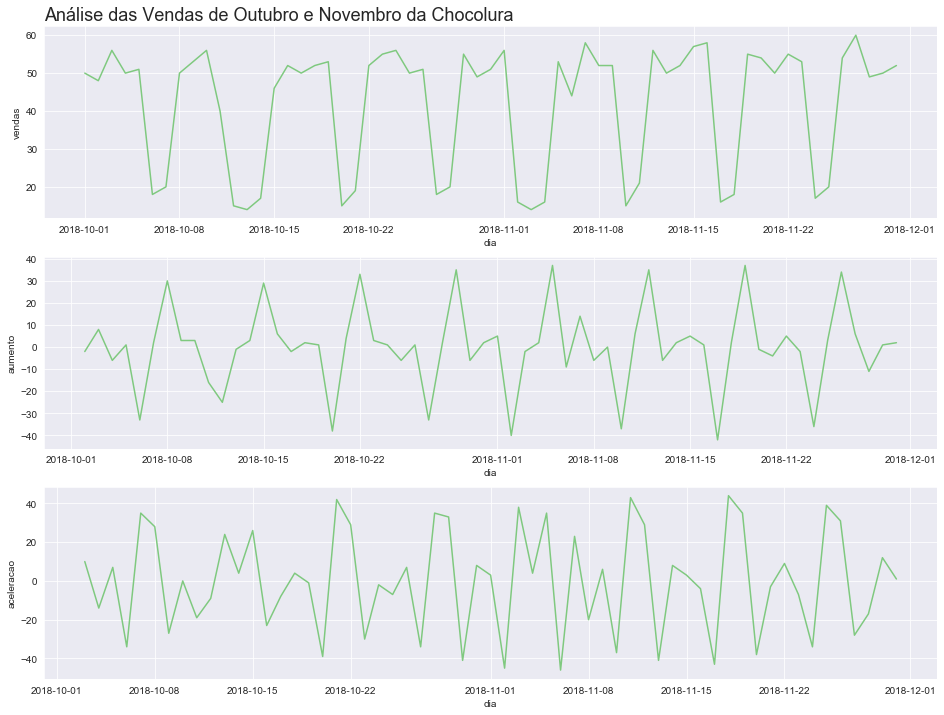

In [56]:
plot_comparacao('dia', 'vendas', 'aumento', 'aceleracao', vendas_por_dia, 'Análise das Vendas de Outubro e Novembro da Chocolura')

**Analisando a sazonalidade**

In [57]:
vendas_por_dia['dia_da_semana'] = vendas_por_dia['dia'].dt.day_name()
vendas_por_dia.head()

,dia,vendas,aumento,aceleracao,dia_da_semana
0,2018-10-01,50,NaN,NaN,Monday
1,2018-10-02,48,-2.0,NaN,Tuesday
2,2018-10-03,56,8.0,10.0,Wednesday
3,2018-10-04,50,-6.0,-14.0,Thursday
4,2018-10-05,51,1.0,7.0,Friday


In [58]:
vendas_por_dia['dia_da_semana'].unique()

array(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday',
       'Sunday'], dtype=object)

In [59]:
dias_traduzidos = {'Monday':'Segunda', 'Tuesday':'Terça', 'Wednesday':'Quarta',
                   'Thursday':'Quinta', 'Friday':'Sexta', 'Saturday':'Sabado',
       'Sunday':'Domingo'}

In [60]:
vendas_por_dia['dia_da_semana'] = vendas_por_dia['dia_da_semana'].map(dias_traduzidos)

In [61]:
vendas_por_dia.head(14)

,dia,vendas,aumento,aceleracao,dia_da_semana
0,2018-10-01,50,NaN,NaN,Segunda
1,2018-10-02,48,-2.0,NaN,Terça
2,2018-10-03,56,8.0,10.0,Quarta
3,2018-10-04,50,-6.0,-14.0,Quinta
4,2018-10-05,51,1.0,7.0,Sexta
5,2018-10-06,18,-33.0,-34.0,Sabado
6,2018-10-07,20,2.0,35.0,Domingo
7,2018-10-08,50,30.0,28.0,Segunda
8,2018-10-09,53,3.0,-27.0,Terça
9,2018-10-10,56,3.0,0.0,Quarta


*Analisando os dados, observa-se um decaimento das vendas nos finais de semana e nos feriados**

**Agrupando os dias**

In [64]:
vendas_agrupadas = vendas_por_dia.groupby('dia_da_semana')['vendas', 'aumento', 'aceleracao'].mean().round()
vendas_agrupadas

C:\Users\barba\anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


,vendas,aumento,aceleracao
dia_da_semana,,,
Domingo,19.0,3.0,31.0
Quarta,53.0,1.0,2.0
Quinta,51.0,-2.0,-3.0
Sabado,16.0,-28.0,-20.0
Segunda,52.0,34.0,31.0
Sexta,45.0,-7.0,-5.0
Terça,52.0,-1.0,-34.0
